In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import random
import torch
import torchvision
from torch.utils import data
from d2l import torch as d2l
from matplotlib import pyplot as plt

In [3]:
# 下面的代码会先下载数据集
# 然后通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0到1之间
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=torchvision.transforms.ToTensor(), download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=torchvision.transforms.ToTensor(), download=True)

Using downloaded and verified file: ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw

Using downloaded and verified file: ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw

Using downloaded and verified file: ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw

Using downloaded and verified file: ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



In [4]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [16]:
# mnist 数据集的构成：
# [图片 (1*28*28), label] * 60000 组
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [21]:
def get_fashion_mnist_labels(labels):
    '''
    返回Fashion-MNIST数据集的文本标签
    '''
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.2):
    '''
    绘制图像列表
    '''
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

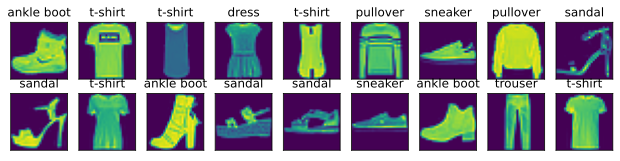

In [24]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [29]:
# 这里指定了每次读数据的时候开4个线程，4个dataloader的worker
batch_size = 256
dataloader_worker_count = 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=dataloader_worker_count)

# 计时，测一下性能
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'2.06 sec'

In [30]:
# 进行分装，增加 Resize 功能
def load_data_fashion_mnist(batch_size, dataloader_worker_count, resize=None):
    trans = [torchvision.transforms.ToTensor()]
    if resize:
        trans.insert(0, torchvision.transforms.Resize(resize))
    trans = torchvision.transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=dataloader_worker_count),
            data.DataLoader(mnist_test, batch_size, shuffle=True, num_workers=dataloader_worker_count))